In [ ]:
# This practial work on decision trees uses https://scikit-learn.org/stable/modules/tree.html

import sklearn
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# to get the documentation: use help(tree.DecisionTreeClassifier)


In [ ]:
# A very simple example, with two examples X, each in one class y:
clf = tree.DecisionTreeClassifier()
X = [[0, 0], [1, 1]]
y = [0, 1]
#Tree construction
clf = clf.fit(X, y)
# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

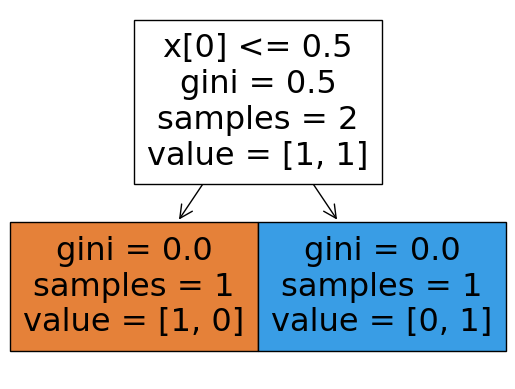

In [ ]:
# display of the tree
tree.plot_tree(clf, filled=True)

**Question 1: What is the node test used to build the tree? Explain the prediction for the new sample.**


1.The node test used to build the tree is based on a feature and uses  `X[1] <= 0.5` as condition :for a sample, if the value of the second feature (indexed as 1) is <= 0.5, it goes to the left branch, in the other case , it goes to the right branch.

2.Passing a sample with features [2., 2.]  for prediction,we have `X[1] = 2` which > 0.5. Consequently,this goes to the right branch,and we get as prediction  `1` when we got `array([1])`.

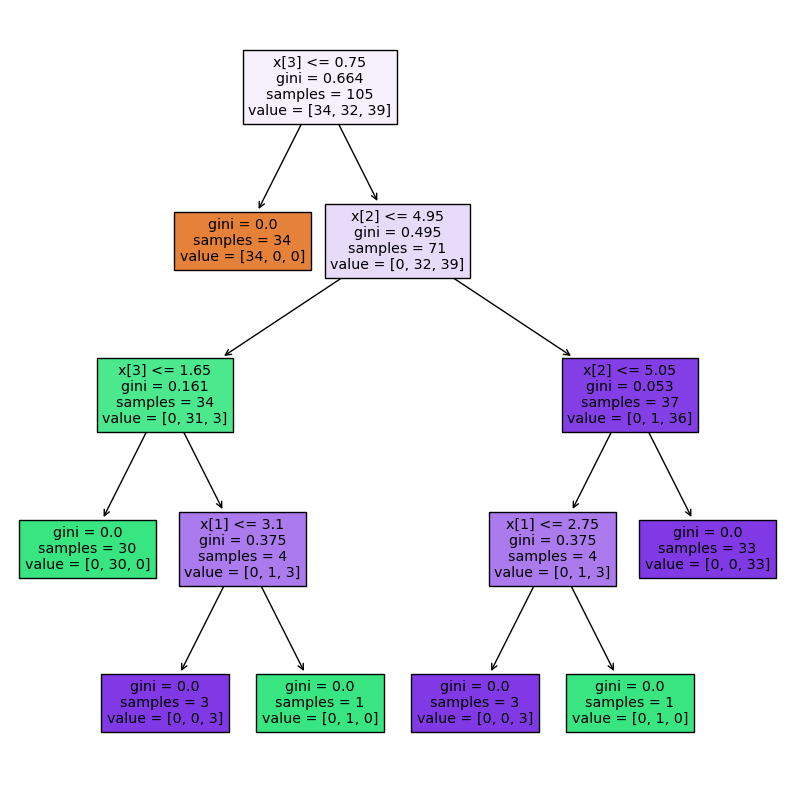

In [ ]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes)
# See https://archive.ics.uci.edu/ml/datasets/Iris

X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [ ]:
# prediction on the test set and computation of the accuracy

clf.predict(X_test)
clf.score(X_test, y_test)


0.9777777777777777

**Question 2: change the initial splitting of the dataset by reducing the size of the training set.What do you observe on the tree? on the accuracy?**

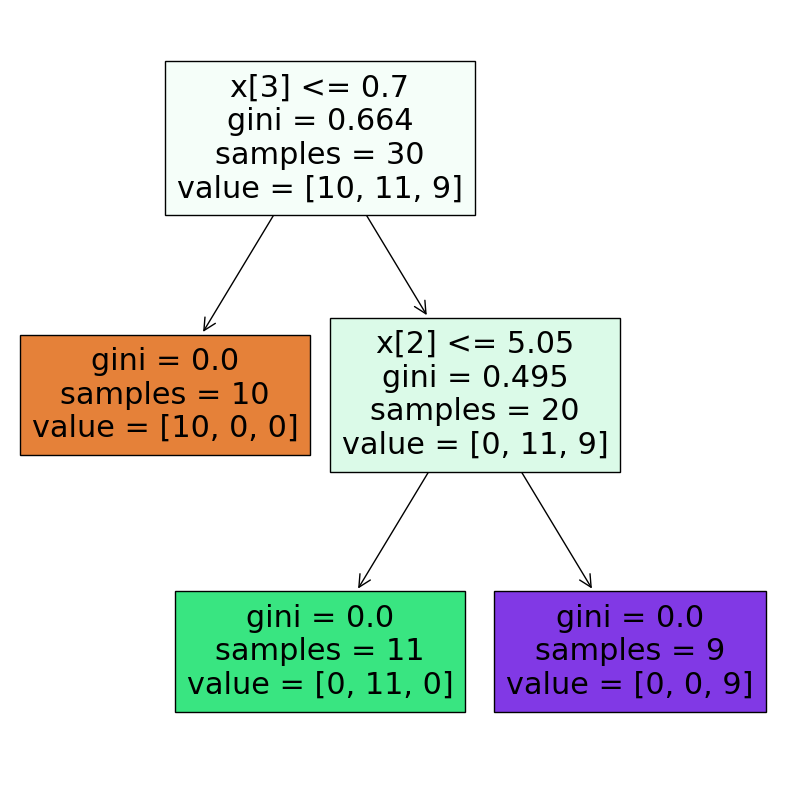

0.9166666666666666

In [ ]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.predict(X_test)
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)
plt.show()
clf.score(X_test, y_test)


We had a less complex tree when we reduced the training set size because of having less data.As we have less data in the training, this could reduce the accuracy

**Question 3: clf = tree.DecisionTreeClassifier() uses default parameters (Gini criterion, no limit on max_depth...),Change the max_depth parameter, the min_samples_leaf parameter, and others if enough time. Conclusion?**

In [ ]:
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy')

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
clf.score(X_test, y_test)


0.9111111111111111

We conclude the following based on each adjustement of each parameter


-For the max_depth : a lower value reduces the complexity of the tree and could possibly result in underfit and  a bigger value elevates the level of complexity of the tree and could result in an overfit


-For min_samples_leaf which represents the minimum number of samples required to be at a leaf node .If we use a higher value ,this could lead to  smoothing our model and then avoiding small splits that catch noise in the data.



-Criterion: the default value here is Gini impurity .We can also apply  entropy to value the quality of the split . Based on this change ,we could have different trees ,however ,the overall performance wouldn't differ too much.

In [ ]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


# Tree 1 (deep tree)

In [ ]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

clf = tree.DecisionTreeClassifier() # default max_depth=none and min_sample_leaf=1
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


# Tree 2 (meduim tree)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


# Tree 3 (shallow tree)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


**Question 4: by testing different trees (built with different parameter values),does a class appear as easier to classify than the others?**

The first class displays  high prediction accuracy through different tree variations from the confusion matrix of different configurations of the decision tree which could makes this class the easiest to classify for any complexity or depth considered in the decision tree.